In [17]:
import matplotlib.pyplot as plt
import scipy.io as sio

In [18]:
mat = sio.loadmat('capacity_test.mat')

In [19]:
print(sorted(mat.keys()))

['__globals__', '__header__', '__version__', 'cap', 'col_cell_label', 'curr', 'row_diag_number', 'time', 'vcell']


In [20]:
# this is all the battery labels i.e. each label is a sepearte lgm50 battery
mat['col_cell_label']

array([[array(['W3'], dtype='<U2'), array(['W4'], dtype='<U2'),
        array(['W5'], dtype='<U2'), array(['W7'], dtype='<U2'),
        array(['W8'], dtype='<U2'), array(['W9'], dtype='<U2'),
        array(['W10'], dtype='<U3'), array(['G1'], dtype='<U2'),
        array(['V4'], dtype='<U2'), array(['V5'], dtype='<U2')]],
      dtype=object)

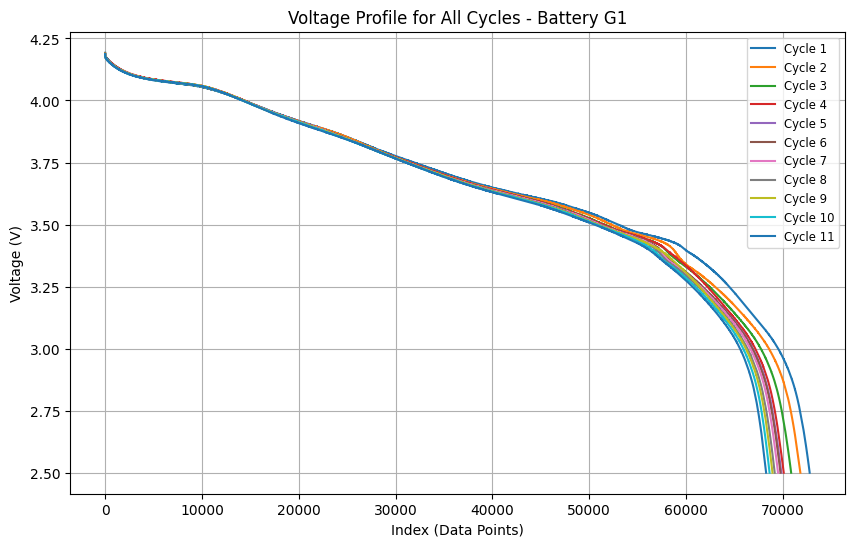

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

mat = sio.loadmat('capacity_test.mat')

battery_label = 'G1'
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Iterate over all rows of vcell for the specified column index
vcell_all_cycles = mat['vcell'][:, col_index]  

plt.figure(figsize=(10, 6))
for i, vcell_cycle in enumerate(vcell_all_cycles):
    if vcell_cycle.size > 1 and not np.isnan(vcell_cycle).all():  # Skip empty or NaN rows
        vcell = vcell_cycle[~np.isnan(vcell_cycle)].reshape(-1)  # Remove NaN and flatten
        plt.plot(vcell, label=f"Cycle {i+1}")

# Plot formatting
plt.xlabel("Index (Data Points)")
plt.ylabel("Voltage (V)")
plt.title(f"Voltage Profile for All Cycles - Battery {battery_label}")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()


In [22]:
mat['col_cell_label']

array([[array(['W3'], dtype='<U2'), array(['W4'], dtype='<U2'),
        array(['W5'], dtype='<U2'), array(['W7'], dtype='<U2'),
        array(['W8'], dtype='<U2'), array(['W9'], dtype='<U2'),
        array(['W10'], dtype='<U3'), array(['G1'], dtype='<U2'),
        array(['V4'], dtype='<U2'), array(['V5'], dtype='<U2')]],
      dtype=object)

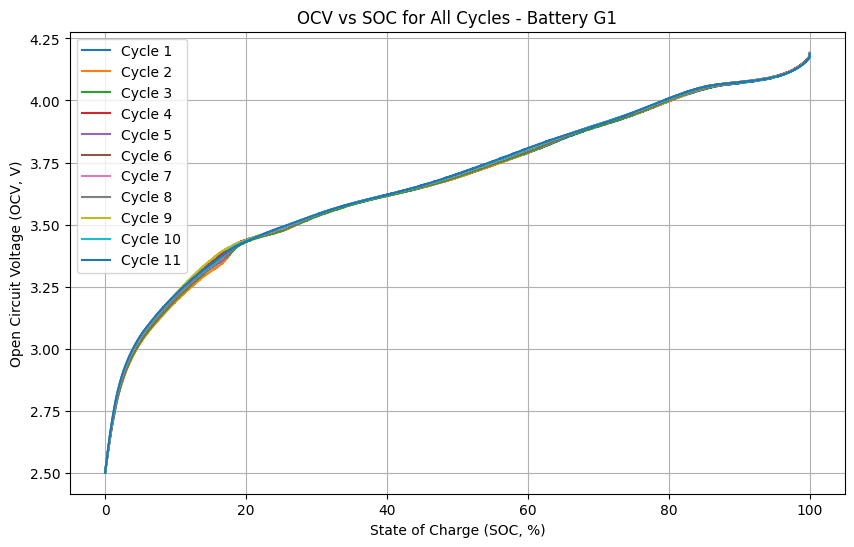

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('capacity_test.mat')

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

Q_end = []
SOC = []
OCV = []

# Check if the number of cycles in `cap` and `vcell` match
num_cycles = min(len(cap), len(vcell)) 

# Loop over the cycles and extract the OCV-SOC relationship
for i in range(num_cycles):
    capacity = cap[i]
    
    if capacity.size > 1 and not np.isnan(capacity).all():  # Skip empty or NaN rows
        cap_cycle = capacity[~np.isnan(capacity)].reshape(-1)  # Remove NaN and flatten

        # Calculate SOC
        Q_end = cap_cycle[-1]
        # (current_capacity / capacity_end_of_cycle) * 100
        soc_cycle = (cap_cycle / Q_end) * 100  # SOC from 0% to 100% based on last capacity in the cycle
        # SoC from 100% to 0%
        soc_cycle = 100 - soc_cycle.flatten() # Invert SOC for data orientation
        
        SOC.append(soc_cycle)
        
        # Extract corresponding OCV for the current cycle
        vcell_cycle = vcell[i].flatten()  # Access the i-th voltage cycle from vcell and flatten to be used in data fitting
        OCV.append(vcell_cycle)

# Plot OCV vs SOC for each cycle
plt.figure(figsize=(10, 6))
for i in range(len(SOC)):
    plt.plot(SOC[i], OCV[i], label=f"Cycle {i+1}")

plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title(f"OCV vs SOC for All Cycles - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

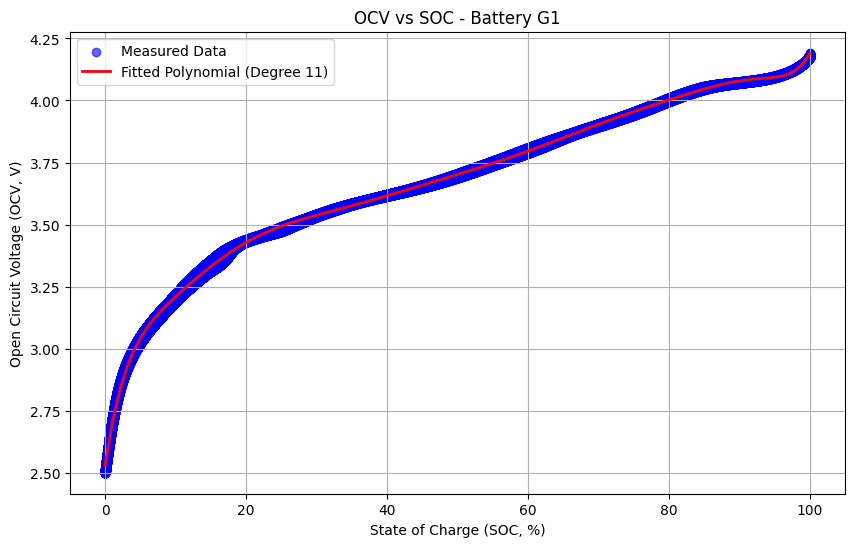

In [6]:
SOC_flat = np.concatenate(SOC)
OCV_flat = np.concatenate(OCV)

# Fit polynomial 
degree = 11
coeffs = np.polyfit(SOC_flat, OCV_flat, degree)
# Create a polynomial function
poly_fit = np.poly1d(coeffs)    

# Generate smooth SOC values for plotting the fit curve
SOC_smooth = np.linspace(min(SOC_flat), max(SOC_flat), 100)
OCV_smooth = poly_fit(SOC_smooth)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(SOC_flat, OCV_flat, label="Measured Data", color='blue', alpha=0.6)
plt.plot(SOC_smooth, OCV_smooth, label=f"Fitted Polynomial (Degree {degree})", color='red', linewidth=2)
plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title(f"OCV vs SOC - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

  SOC      OCV
  0.0 2.530047
  1.0 2.699011
  2.0 2.824260
  3.0 2.917587
  4.0 2.988059
  5.0 3.042528
  6.0 3.086079
  7.0 3.122391
  8.0 3.154052
  9.0 3.182806
 10.0 3.209771
 11.0 3.235599
 12.0 3.260617
 13.0 3.284932
 14.0 3.308515
 15.0 3.331257
 16.0 3.353023
 17.0 3.373677
 18.0 3.393108
 19.0 3.411236
 20.0 3.428025
 21.0 3.443480
 22.0 3.457643
 23.0 3.470591
 24.0 3.482427
 25.0 3.493274
 26.0 3.503268
 27.0 3.512550
 28.0 3.521260
 29.0 3.529533
 30.0 3.537492
 31.0 3.545248
 32.0 3.552895
 33.0 3.560510
 34.0 3.568155
 35.0 3.575874
 36.0 3.583694
 37.0 3.591631
 38.0 3.599690
 39.0 3.607865
 40.0 3.616144
 41.0 3.624513
 42.0 3.632953
 43.0 3.641448
 44.0 3.649985
 45.0 3.658551
 46.0 3.667140
 47.0 3.675751
 48.0 3.684389
 49.0 3.693063
 50.0 3.701787
 51.0 3.710580
 52.0 3.719462
 53.0 3.728455
 54.0 3.737582
 55.0 3.746862
 56.0 3.756315
 57.0 3.765954
 58.0 3.775786
 59.0 3.785815
 60.0 3.796036
 61.0 3.806438
 62.0 3.817003
 63.0 3.827705
 64.0 3.838516
 65.0 3.84

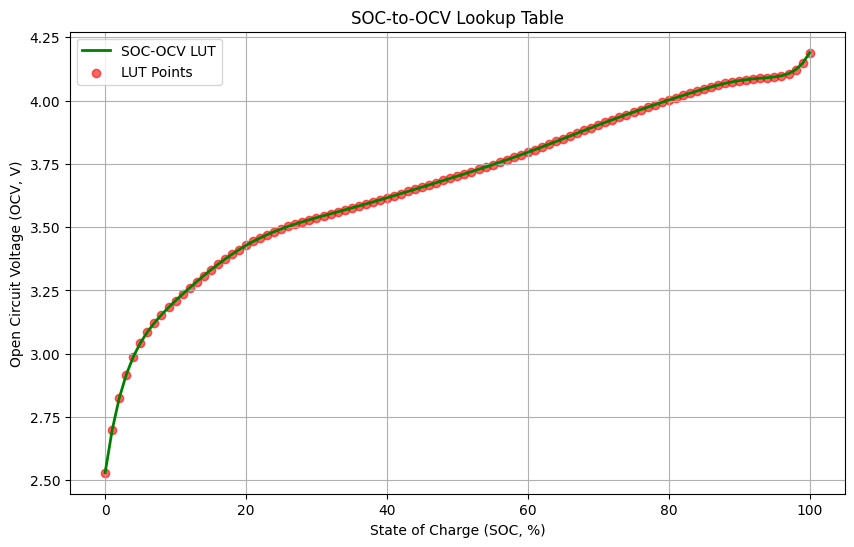

In [4]:
import os
import pandas as pd 

# Define the SOC range for the LUT
SOC_LUT = np.linspace(0, 100, 101)  # 101 points from 0% to 100% SOC
OCV_LUT = poly_fit(SOC_LUT)  # Compute OCV for each SOC level using the fitted polynomial

# Combine SOC and OCV into a LUT
lut = np.column_stack((SOC_LUT, OCV_LUT))  # Combine SOC and OCV values

# Optionally, convert to a Pandas DataFrame for better visualization
lut_df = pd.DataFrame(lut, columns=["SOC", "OCV"])

# Print the lookup table
print(lut_df.to_string(index=False))

output_folder = "soc_ocv"
output_file = os.path.join(output_folder, f"{battery_label}_soc_to_ocv.csv")
lut_df.to_csv(output_file, index=False)

# Plot the LUT for visualization
plt.figure(figsize=(10, 6))
plt.plot(SOC_LUT, OCV_LUT, label="SOC-OCV LUT", color='green', linewidth=2)
plt.scatter(SOC_LUT, OCV_LUT, color='red', alpha=0.6, label="LUT Points")
plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title("SOC-to-OCV Lookup Table")
plt.legend()
plt.grid(True)
plt.show()